In [1]:
!pip install pyforest 
!pip install imblearn
!pip install xgboost

Firstly, install the required packages for this project:



•	with pyforest you can as well use a library that is yet to be imported


•	imblearn is used especially for a working dataset with signicant imbalance in it


•	xgboost is a ML algorithm required for one of the models to be used in this project

After installations, restart the kernel and proceed with the subsequent code scripts.

In [1]:
import pyforest 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
import itertools
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import statsmodels.api as stm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Having installed the needed packages, it is imported into the script as a library to perform the set functions. The above are libraries required for the analysis of the credit card client dataset.

In [2]:
data = pd.read_excel("default_of_credit_card_clients.xls", skiprows = 1).set_index("ID")
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Thereafter import the data file into Jupyter for analysis. The file has first row is skipped because it was not needed and the ID column was set as the index column.
Using the head function, the first few datapoints was displayed for exploratory data analysis to be carried out.

In [3]:
data.rename(columns = {'default payment next month':'default_payment_next_month'}, inplace = True)

The target column was renamed to accomodate for the space in between followed standard practice for nameing variables

In [4]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


The describe metrics of the pandas library provides a snapshot of the statistical disttribution of each column in the data set to be analysed

In [5]:
data.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

The data set is scrutinized for any missing values and none was returned. We proceed to the exploratory data analysis

--------------------- EXPLORATORY DATA ANALYSIS ------------------------------
-

In [6]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

First have a glance at the column name to ensure its in concordance with standard variable naming practice. Our target column is properly named 

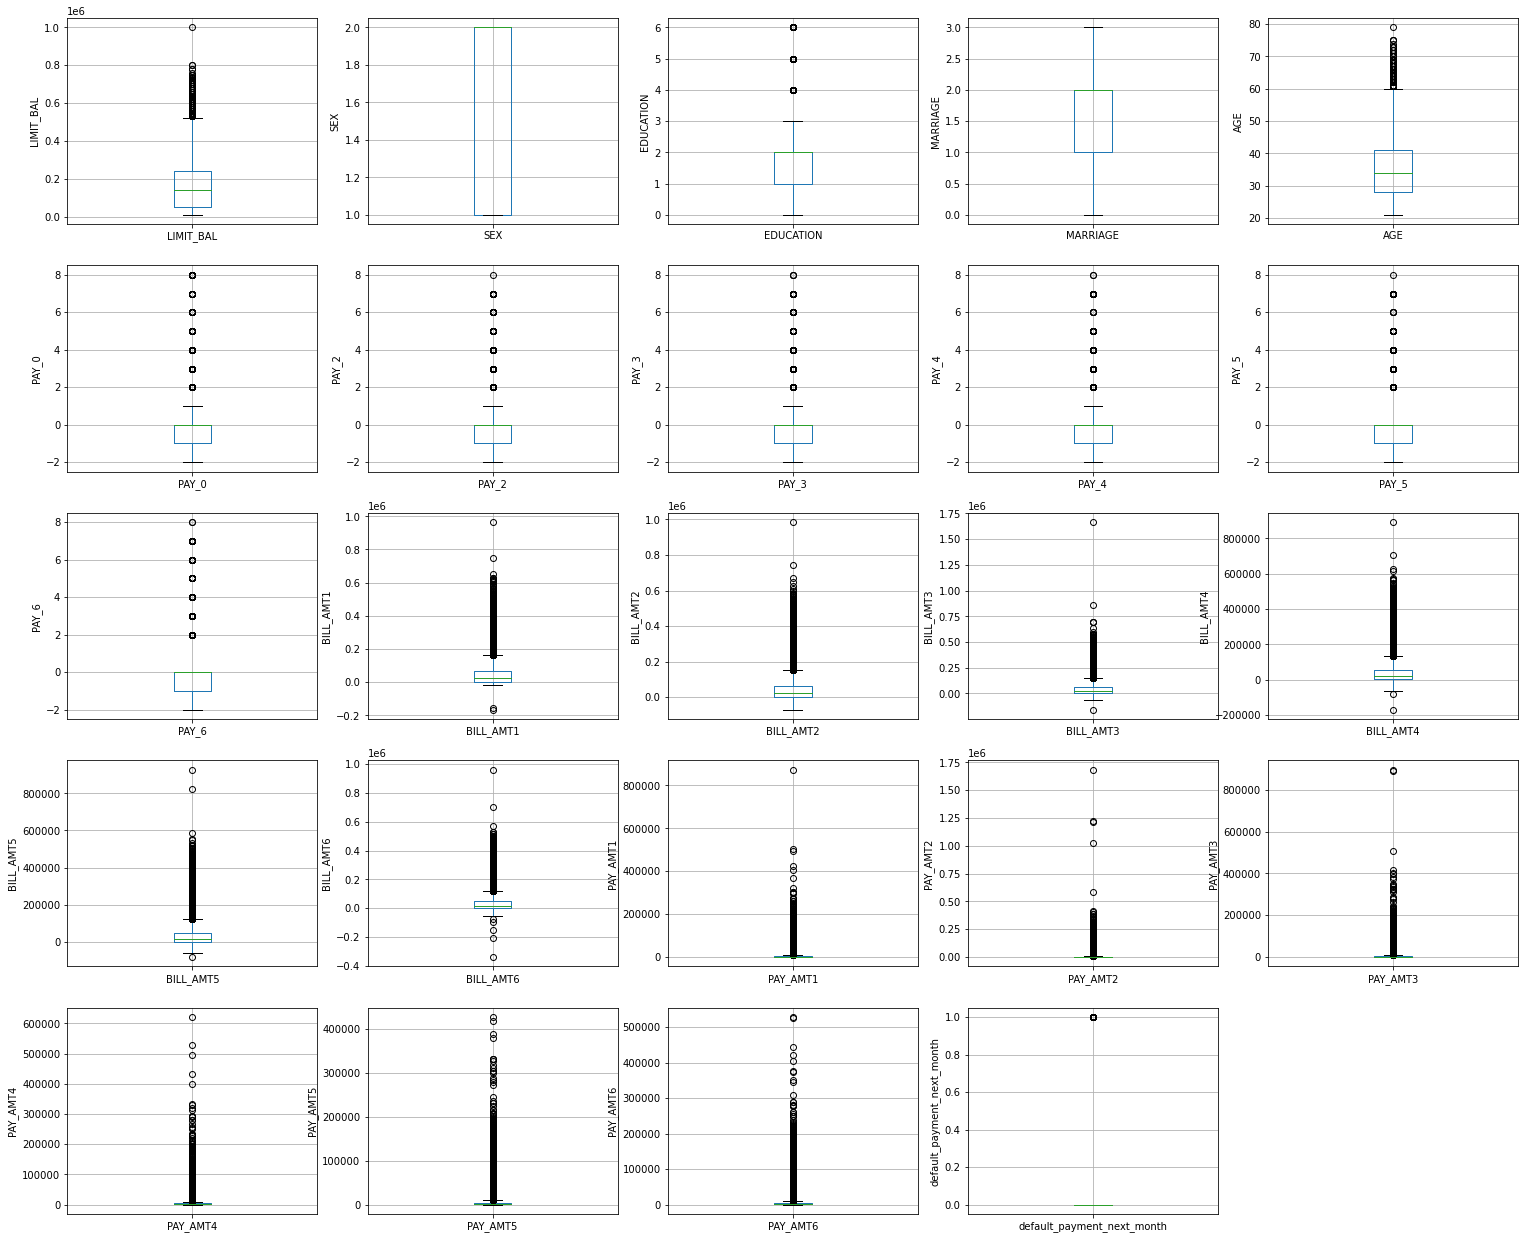

In [7]:
plt.figure(figsize = (26,22))

plt.subplot(5,5,1)
fig = data.boxplot(column = 'LIMIT_BAL')
fig.set_title("")
fig.set_ylabel('LIMIT_BAL')

plt.subplot(5,5,2)
fig = data.boxplot(column = 'SEX')
fig.set_title("")
fig.set_ylabel('SEX')

plt.subplot(5,5,3)
fig = data.boxplot(column = 'EDUCATION')
fig.set_title("")
fig.set_ylabel('EDUCATION')

plt.subplot(5,5,4)
fig = data.boxplot(column = 'MARRIAGE')
fig.set_title("")
fig.set_ylabel('MARRIAGE')

plt.subplot(5,5,5)
fig = data.boxplot(column = 'AGE')
fig.set_title("")
fig.set_ylabel('AGE')

plt.subplot(5,5,6)
fig = data.boxplot(column = 'PAY_0')
fig.set_title("")
fig.set_ylabel('PAY_0')

plt.subplot(5,5,7)
fig = data.boxplot(column = 'PAY_2')
fig.set_title("")
fig.set_ylabel('PAY_2')

plt.subplot(5,5,8)
fig = data.boxplot(column = 'PAY_3')
fig.set_title("")
fig.set_ylabel('PAY_3')

plt.subplot(5,5,9)
fig = data.boxplot(column = 'PAY_4')
fig.set_title("")
fig.set_ylabel('PAY_4')

plt.subplot(5,5,10)
fig = data.boxplot(column = 'PAY_5')
fig.set_title("")
fig.set_ylabel('PAY_5')

plt.subplot(5,5,11)
fig = data.boxplot(column = 'PAY_6')
fig.set_title("")
fig.set_ylabel('PAY_6')

plt.subplot(5,5,12)
fig = data.boxplot(column = 'BILL_AMT1')
fig.set_title("")
fig.set_ylabel('BILL_AMT1')

plt.subplot(5,5,13)
fig = data.boxplot(column = 'BILL_AMT2')
fig.set_title("")
fig.set_ylabel('BILL_AMT2')

plt.subplot(5,5,14)
fig = data.boxplot(column = 'BILL_AMT3')
fig.set_title("")
fig.set_ylabel('BILL_AMT3')

plt.subplot(5,5,15)
fig = data.boxplot(column = 'BILL_AMT4')
fig.set_title("")
fig.set_ylabel('BILL_AMT4')

plt.subplot(5,5,16)
fig = data.boxplot(column = 'BILL_AMT5')
fig.set_title("")
fig.set_ylabel('BILL_AMT5')

plt.subplot(5,5,17)
fig = data.boxplot(column = 'BILL_AMT6')
fig.set_title("")
fig.set_ylabel('BILL_AMT6')

plt.subplot(5,5,18)
fig = data.boxplot(column = 'PAY_AMT1')
fig.set_title("")
fig.set_ylabel('PAY_AMT1')

plt.subplot(5,5,19)
fig = data.boxplot(column = 'PAY_AMT2')
fig.set_title("")
fig.set_ylabel('PAY_AMT2')

plt.subplot(5,5,20)
fig = data.boxplot(column = 'PAY_AMT3')
fig.set_title("")
fig.set_ylabel('PAY_AMT3')

plt.subplot(5,5,21)
fig = data.boxplot(column = 'PAY_AMT4')
fig.set_title("")
fig.set_ylabel('PAY_AMT4')

plt.subplot(5,5,22)
fig = data.boxplot(column = 'PAY_AMT5')
fig.set_title("")
fig.set_ylabel('PAY_AMT5')

plt.subplot(5,5,23)
fig = data.boxplot(column = 'PAY_AMT6')
fig.set_title("")
fig.set_ylabel('PAY_AMT6')

plt.subplot(5,5,24)
fig = data.boxplot(column = 'default_payment_next_month')
fig.set_title("")
fig.set_ylabel('default_payment_next_month')

plt.show()

Kick off the EDA with visualizations to better understand the dataset. From the boxplot viaualization above, there appears to be outliers for which an attempt to rid the data set of these outliers would result in a significant loss of data. Hence the data set is maintained for our analysis instead.

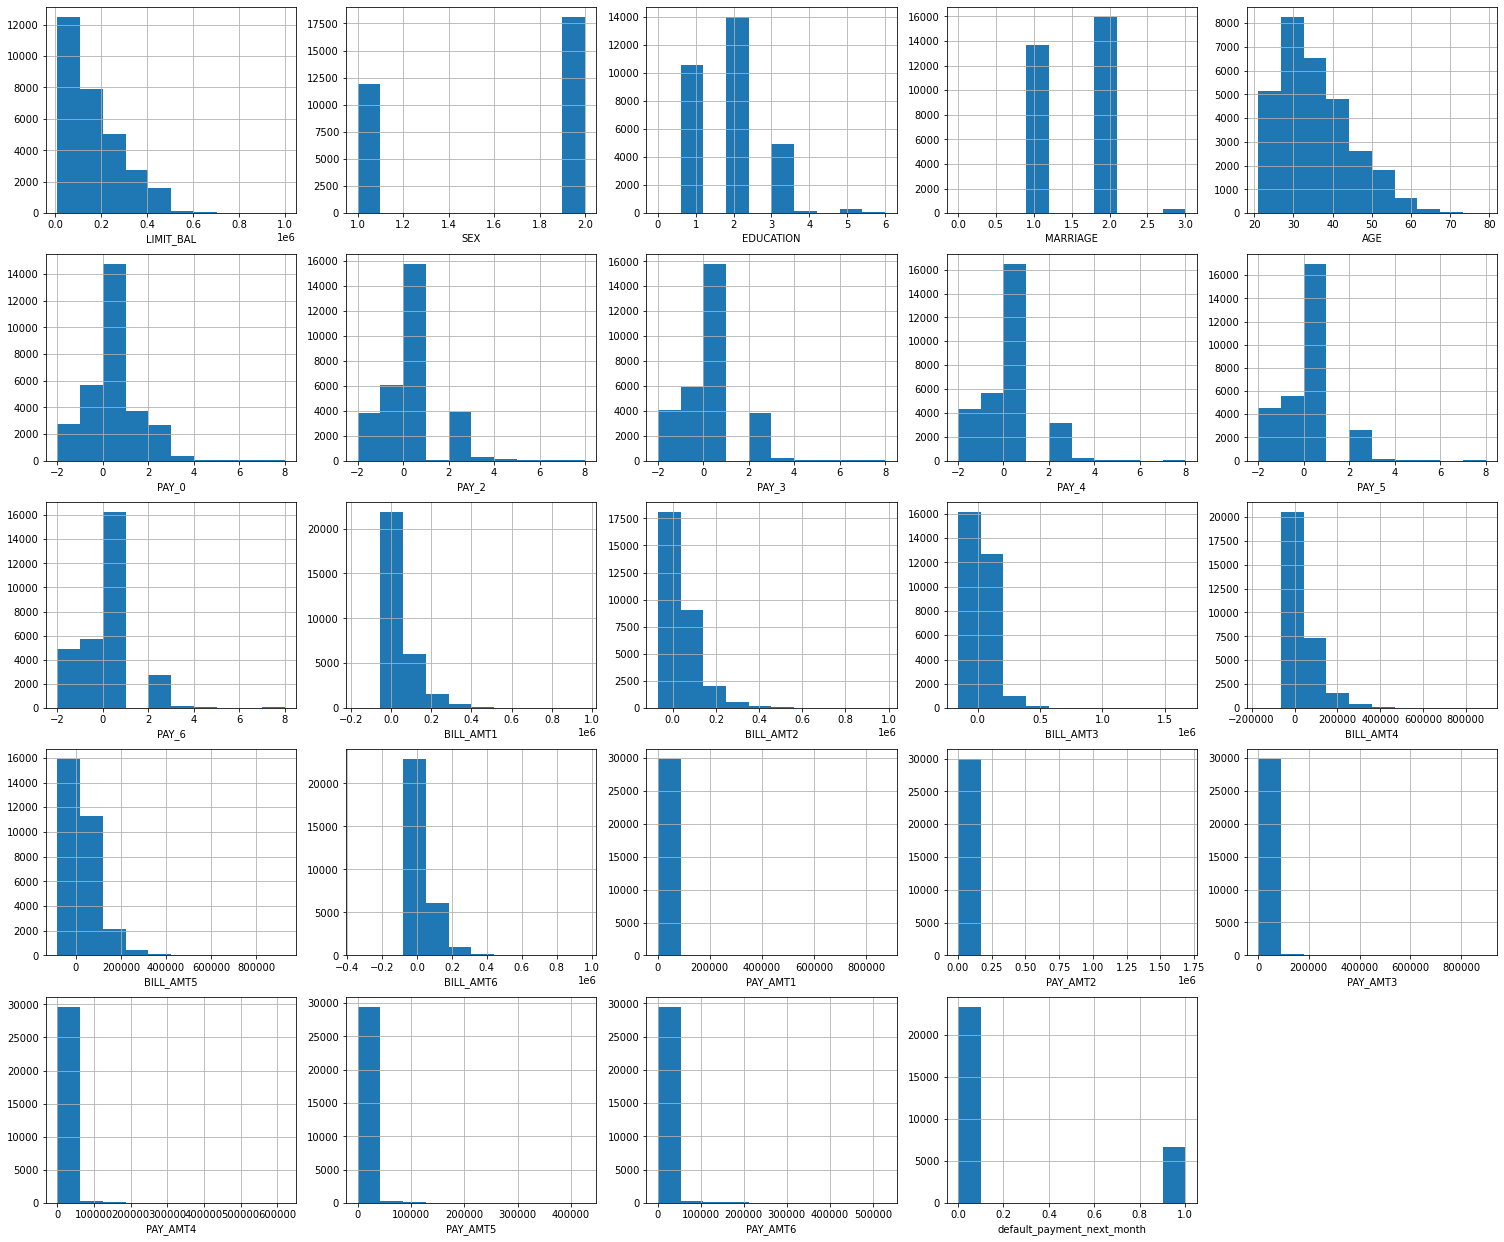

In [8]:
plt.figure(figsize = (26,22))

plt.subplot(5,5,1)
fig = data['LIMIT_BAL'].hist(bins = 10)
fig.set_title("")
fig.set_xlabel('LIMIT_BAL')

plt.subplot(5,5,2)
fig = data['SEX'].hist(bins = 10)
fig.set_title("")
fig.set_xlabel('SEX')

plt.subplot(5,5,3)
fig = data['EDUCATION'].hist(bins = 10)
fig.set_title("")
fig.set_xlabel('EDUCATION')

plt.subplot(5,5,4)
fig = data['MARRIAGE'].hist(bins = 10)
fig.set_title("")
fig.set_xlabel('MARRIAGE')

plt.subplot(5,5,5)
fig = data['AGE'].hist(bins = 10)
fig.set_title("")
fig.set_xlabel('AGE')

plt.subplot(5,5,6)
fig = data['PAY_0'].hist(bins = 10)
fig.set_title("")
fig.set_xlabel('PAY_0')

plt.subplot(5,5,7)
fig = data['PAY_2'].hist(bins = 10)
fig.set_title("")
fig.set_xlabel('PAY_2')

plt.subplot(5,5,8)
fig = data['PAY_3'].hist(bins = 10)
fig.set_title("")
fig.set_xlabel('PAY_3')

plt.subplot(5,5,9)
fig = data['PAY_4'].hist(bins = 10)
fig.set_title("")
fig.set_xlabel('PAY_4')

plt.subplot(5,5,10)
fig = data['PAY_5'].hist(bins = 10)
fig.set_title("")
fig.set_xlabel('PAY_5')

plt.subplot(5,5,11)
fig = data['PAY_6'].hist(bins = 10)
fig.set_title("")
fig.set_xlabel('PAY_6')

plt.subplot(5,5,12)
fig = data['BILL_AMT1'].hist(bins = 10)
fig.set_title("")
fig.set_xlabel('BILL_AMT1')

plt.subplot(5,5,13)
fig = data['BILL_AMT2'].hist(bins = 10)
fig.set_title("")
fig.set_xlabel('BILL_AMT2')

plt.subplot(5,5,14)
fig = data['BILL_AMT3'].hist(bins = 10)
fig.set_title("")
fig.set_xlabel('BILL_AMT3')

plt.subplot(5,5,15)
fig = data['BILL_AMT4'].hist(bins = 10)
fig.set_title("")
fig.set_xlabel('BILL_AMT4')

plt.subplot(5,5,16)
fig = data['BILL_AMT5'].hist(bins = 10)
fig.set_title("")
fig.set_xlabel('BILL_AMT5')

plt.subplot(5,5,17)
fig = data['BILL_AMT6'].hist(bins = 10)
fig.set_title("")
fig.set_xlabel('BILL_AMT6')

plt.subplot(5,5,18)
fig = data['PAY_AMT1'].hist(bins = 10)
fig.set_title("")
fig.set_xlabel('PAY_AMT1')

plt.subplot(5,5,19)
fig = data['PAY_AMT2'].hist(bins = 10)
fig.set_title("")
fig.set_xlabel('PAY_AMT2')

plt.subplot(5,5,20)
fig = data['PAY_AMT3'].hist(bins = 10)
fig.set_title("")
fig.set_xlabel('PAY_AMT3')

plt.subplot(5,5,21)
fig = data['PAY_AMT4'].hist(bins = 10)
fig.set_title("")
fig.set_xlabel('PAY_AMT4')

plt.subplot(5,5,22)
fig = data['PAY_AMT5'].hist(bins = 10)
fig.set_title("")
fig.set_xlabel('PAY_AMT5')

plt.subplot(5,5,23)
fig = data['PAY_AMT6'].hist(bins = 10)
fig.set_title("")
fig.set_xlabel('PAY_AMT6')

plt.subplot(5,5,24)
fig = data['default_payment_next_month'].hist(bins = 10)
fig.set_title("")
fig.set_xlabel('default_payment_next_month')

plt.show()

From both plots that is the boxplot and bar chart, the data set is quite unbalanced with outliers very distinct. The skewness of the distribution plot is very evident. We apply the SMOTEENN function in order to oversample the minority class and undersample the majority class to tone down biasness that may result in the model design.

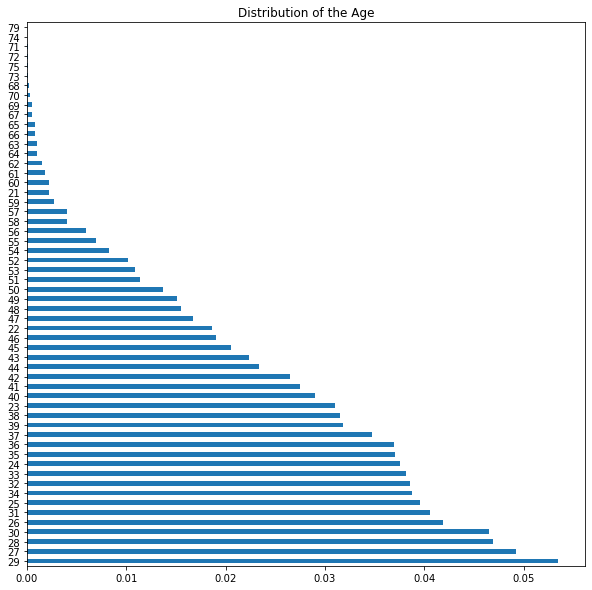

In [9]:
fig, ax = plt.subplots(figsize = (10,10))
data.AGE.value_counts(normalize = True)
data.AGE.value_counts(normalize = True).plot.barh()
plt.title("Distribution of the Age")
plt.show()

Using the Age column, the above distribution plot shows credits was accessed more by a younger demography in Taiwan when compared to the other age range. Clients of age 29 years had the highest

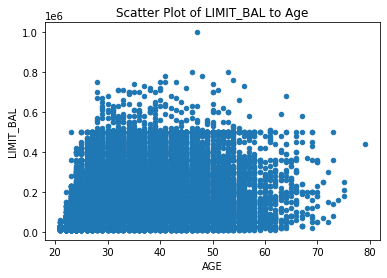

In [10]:
data.plot.scatter(x = "AGE", y = "LIMIT_BAL")
plt.title("Scatter Plot of LIMIT_BAL to Age")
plt.show()

The above visual drives home the aforemention point highlighting the access to credit by a younger demography with a limit balance pegged at 500000 New Taiwanese Dollar. 

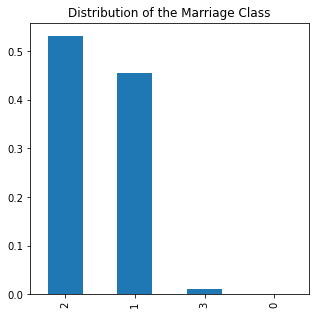

In [11]:
fig, ax = plt.subplots(figsize = (5,5))
data.MARRIAGE.value_counts(normalize = True)
data.MARRIAGE.value_counts(normalize = True).plot.bar()
plt.title("Distribution of the Marriage Class")
plt.show()

The marriage class shown above visualizes the distribution of the differnet marital status inclusive of married, single and others. A larger percentage of the cerdit is subscribed into by the single and married class respectively

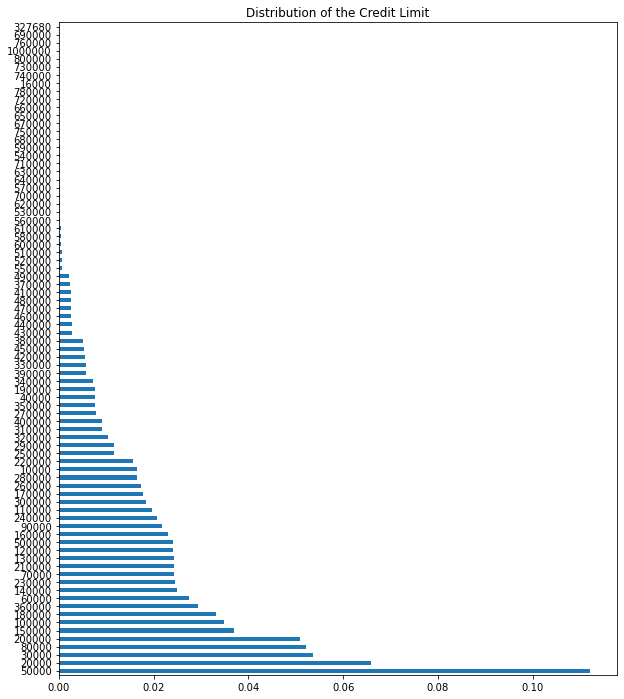

In [12]:
fig, ax = plt.subplots(figsize = (10,12))
data.LIMIT_BAL.value_counts(normalize = True)
data.LIMIT_BAL.value_counts(normalize = True).plot.barh()
plt.title("Distribution of the Credit Limit")
plt.show()

The distribution of the credit amount accessed is visualized to have a glimpse of the credit amount usually requested for by the credit card clients. From the above it shows the amount 50000 New Taiwan Dollar was requested more. It maybe subject to the ease of repayment of such an amount. The lowest was 10000NTDollar and the maximum was capped at 1000000NTDollar

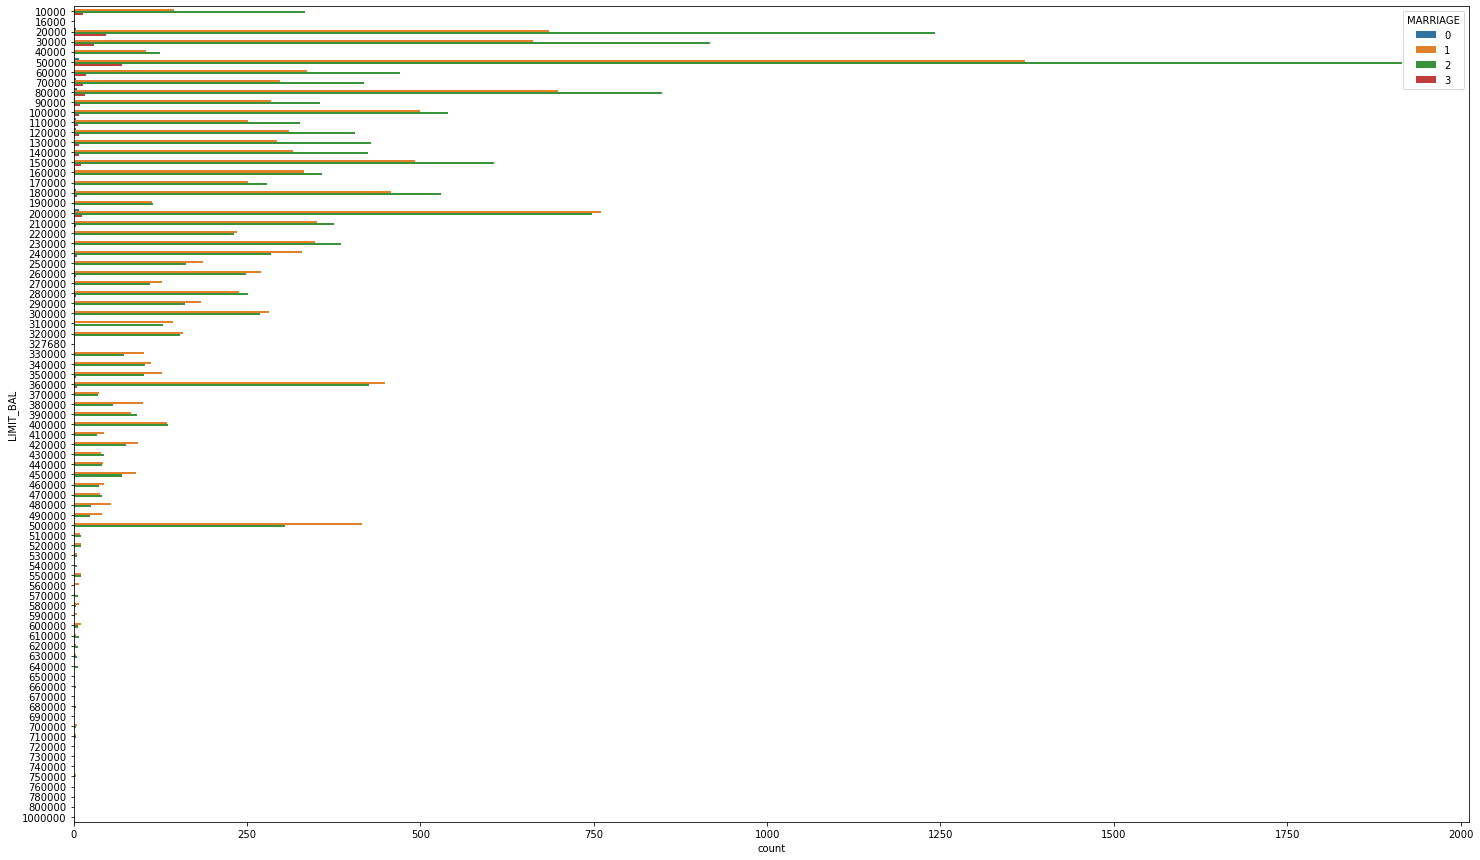

In [13]:
fig, ax = plt.subplots(figsize = (25,15))
sns.countplot(y = data["LIMIT_BAL"], hue = data["MARRIAGE"])
plt.show()

This plot show the limit balance accessed by the different marriage class. More credit access were made by the singles.

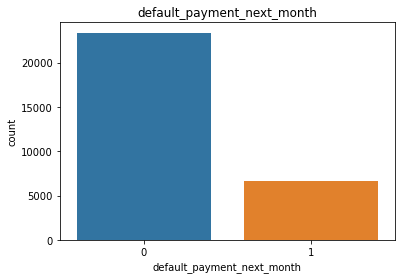

In [14]:
sns.countplot(data = data, x = data["default_payment_next_month"])
plt.title('default_payment_next_month')
plt.show()

This shows the imbalance of the target column, if the analysis continues without smoothening the imbalance, the algortihm would be susceptible to bias

In [15]:
X, y = data.drop(["default_payment_next_month"], axis = 1), data["default_payment_next_month"]

Here the dataset is spliced to features and target column resepectively assigned to the variable X, y

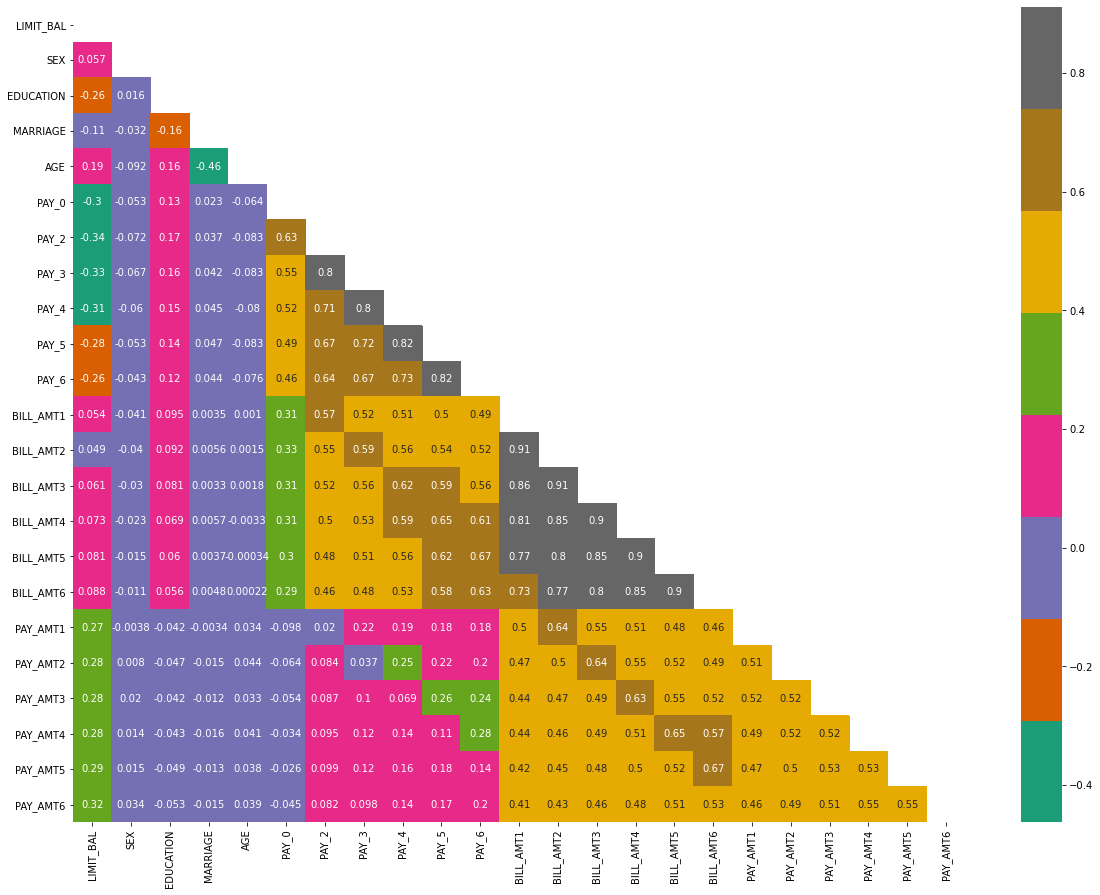

In [16]:
corr_matrix = X.corr(method='spearman')
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, cmap='Dark2', annot=True, fmt='.2g', mask=np.triu(corr_matrix))
plt.show()

A correlation matrix was carried out to find out the relationship between the different features of teh dataset.In the case of significant correlation, feature selection would be carried out to select features of importance only for the analysis. But from the above visual only the BILL_AMT is correlated accross different months.

In [17]:
print("Before Over-Sampling and Under-Sampling, counts of defaulters '1': {}".format(sum(y == 1)))
print("Before Over-Sampling and Under-Sampling, counts of non-defaulters '0': {}".format(sum(y == 0)))

Before Over-Sampling and Under-Sampling, counts of defaulters '1': 6636
Before Over-Sampling and Under-Sampling, counts of non-defaulters '0': 23364


Prior to the application of the sampling technique to be used to correct the imbalance. It is noteworthy to evaluate the predicted class of the target column.

In [18]:
y = LabelEncoder().fit_transform(y)
smt = SMOTEENN(random_state = 42)
X, y = smt.fit_resample(X, y)

<IPython.core.display.Javascript object>

The label encoder function simply converts categorical data if there is to numerical for your analysis. The imported SMOTEENN library is now used to balance the feature and target column.

<AxesSubplot:>

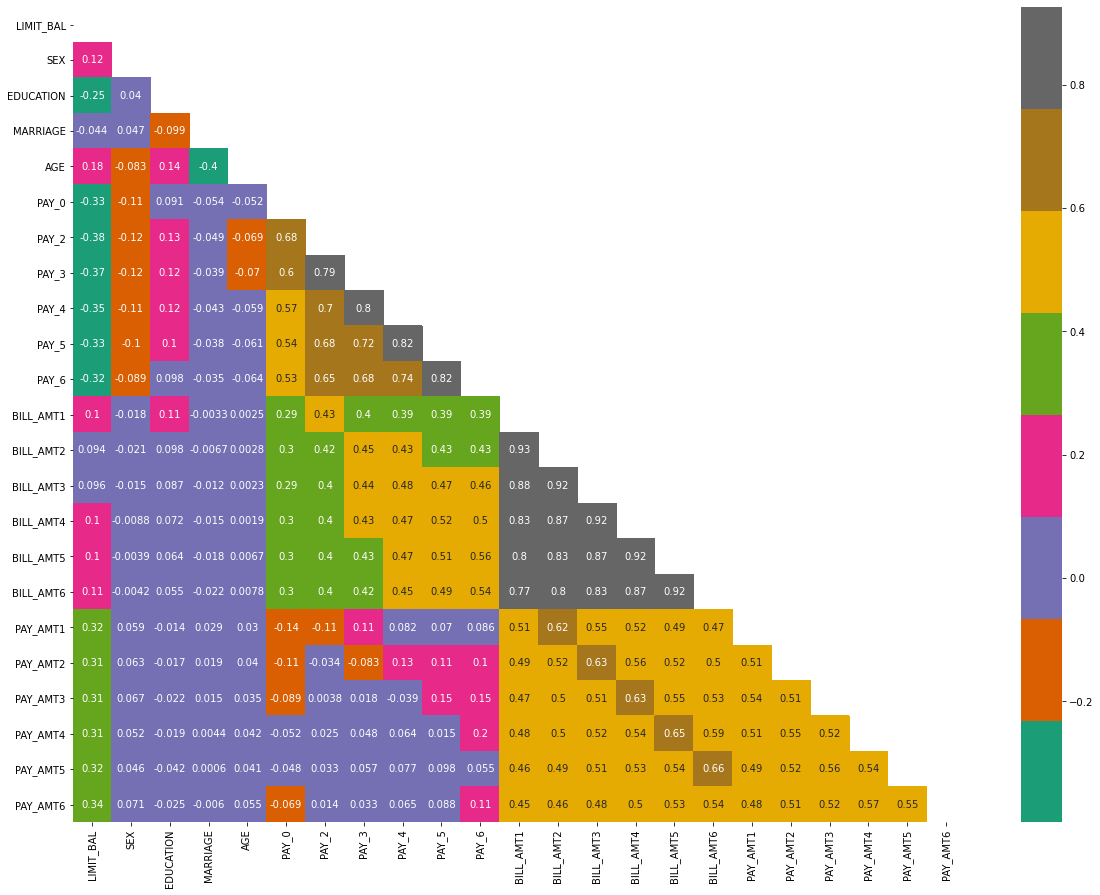

In [19]:
corr_matrix = X.corr(method='spearman')
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, cmap='Dark2', annot=True, fmt='.2g', mask=np.triu(corr_matrix))

With the SMOTEENN function applied, the correlation has been improved

In [20]:
print("After Over-Sampling and Under-Sampling, counts of defaulters '1': {}".format(sum(y == 1)))
print("After Over-Sampling and Under-Sampling, counts of non-defaulters '0': {}".format(sum(y == 0)))

After Over-Sampling and Under-Sampling, counts of defaulters '1': 17011
After Over-Sampling and Under-Sampling, counts of non-defaulters '0': 10380


As can now be seen the target column is a bit balanced in regards to the majority and minority class

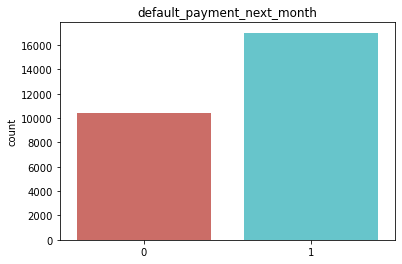

In [21]:
sns.countplot(data = data, x = y, palette = 'hls')
plt.title('default_payment_next_month')
plt.show()

Which is shown in the above bar plot

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

At this point the data set features and target variable is divided in the proportion of 70% for training the algorithms and 30% for testing the models

-------------------- ALGORITHM DESIGN -----------------------------
-

For all 8 algorithms used, the implementaion flow was thesame;

- First the library to be used was called and assigned to a variable name
- Next the model was used to fit the training dataset
- After that the model was used to predict the test dataset to evaluate the accuracy
- A confusion matrix is plotted using both the established target test test and the predicted target by the model.
- Immediately the above is done, the area under the curve is visualizaed to examine the reciever operating characteristics of the model developed.
- Lasly, a classification report is spooled to gain insight into the recall, precision, f1-score and accuracy of the model made.

---------------------------------- 1. LOGISTIC REGRESSION
-

In [23]:
LogReg = LogisticRegression(solver = 'lbfgs', max_iter = 1000)
LogReg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [24]:
LR_y_pred = LogReg.predict(X_test)
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'.format(LogReg.score(X_test, y_test)))

Accuracy of Logistic Regression classifier on test set: 0.73


Confusion Matrix Without Normalization
[[1364 1703]
 [ 528 4623]]


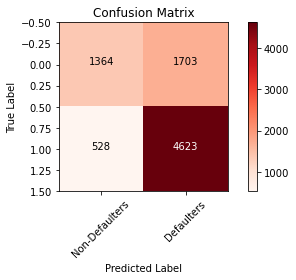

In [25]:
conf_mat = confusion_matrix(y_test, LR_y_pred)

def plot_confusion_matrix(conf_mat, classes,
                         normalize = False, title = 'Confusion Matrix',
                         cmap = plt.cm.Reds):
    
    #prints and plots the confusion matrix
    plt.imshow(conf_mat, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    
    if normalize:
        conf_mat = conf_mat.astype('float') / conf_mat.sum(axis = 1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix Without Normalization")
    print(conf_mat)
    
    thresh = conf_mat.max()/2
    for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
        plt.text(j, i, conf_mat[i, j], 
                horizontalalignment = "center",
                color = "white" if conf_mat[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel("True Label")
        plt.xlabel("Predicted Label")
        
cm_plot_labels = ["Non-Defaulters", "Defaulters"]
plot_confusion_matrix(conf_mat = conf_mat, classes = cm_plot_labels, title = 'Confusion Matrix')

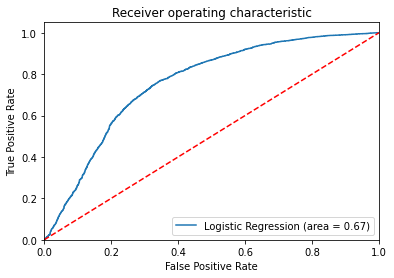

In [26]:
logreg_roc_auc = roc_auc_score(y_test, LogReg.predict(X_test))
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, LogReg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (area = %0.2f)' % logreg_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LogReg_ROC')
plt.show()

In [27]:
print(classification_report(y_test, LR_y_pred))

              precision    recall  f1-score   support

           0       0.72      0.44      0.55      3067
           1       0.73      0.90      0.81      5151

    accuracy                           0.73      8218
   macro avg       0.73      0.67      0.68      8218
weighted avg       0.73      0.73      0.71      8218



----------------------------------- 2. DECISION TREE 
-


In [28]:
DT_gini = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
DT_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [29]:
DT_y_pred = DT_gini.predict(X_test)
print('Accuracy ofDecision Tree classifier on test set: {:.2f}'.format(DT_gini.score(X_test, y_test)))

Accuracy ofDecision Tree classifier on test set: 0.74


Confusion Matrix Without Normalization
[[1631 1436]
 [ 668 4483]]


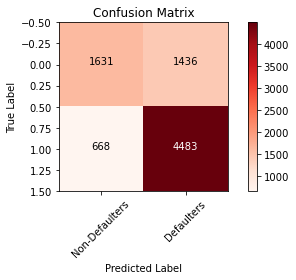

In [30]:
DT_cm = confusion_matrix(y_test, DT_y_pred)

def plot_confusion_matrix(DT_cm, classes,
                         normalize = False, title = 'Confusion Matrix',
                         cmap = plt.cm.Reds):
    
    #prints and plots the confusion matrix
    plt.imshow(DT_cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    
    if normalize:
        DT_cm = DT_cm.astype('float') / DT_cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix Without Normalization")
    print(DT_cm)
    
    thresh = DT_cm.max()/2
    for i, j in itertools.product(range(DT_cm.shape[0]), range(DT_cm.shape[1])):
        plt.text(j, i, DT_cm[i, j], 
                horizontalalignment = "center",
                color = "white" if DT_cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel("True Label")
        plt.xlabel("Predicted Label")
        
cm_plot_labels = ["Non-Defaulters", "Defaulters"]
plot_confusion_matrix(DT_cm = DT_cm, classes = cm_plot_labels, title = 'Confusion Matrix')

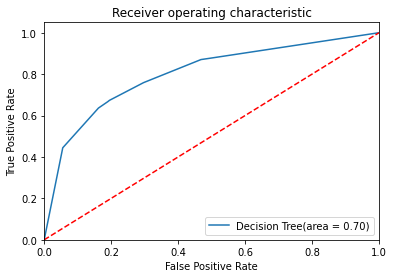

In [31]:
DT_roc_auc = roc_auc_score(y_test, DT_gini.predict(X_test))
DT_fpr, DT_tpr, DT_thresholds = roc_curve(y_test, DT_gini.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(DT_fpr, DT_tpr, label='Decision Tree(area = %0.2f)' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

In [32]:
print(classification_report(y_test, DT_y_pred))

              precision    recall  f1-score   support

           0       0.71      0.53      0.61      3067
           1       0.76      0.87      0.81      5151

    accuracy                           0.74      8218
   macro avg       0.73      0.70      0.71      8218
weighted avg       0.74      0.74      0.73      8218



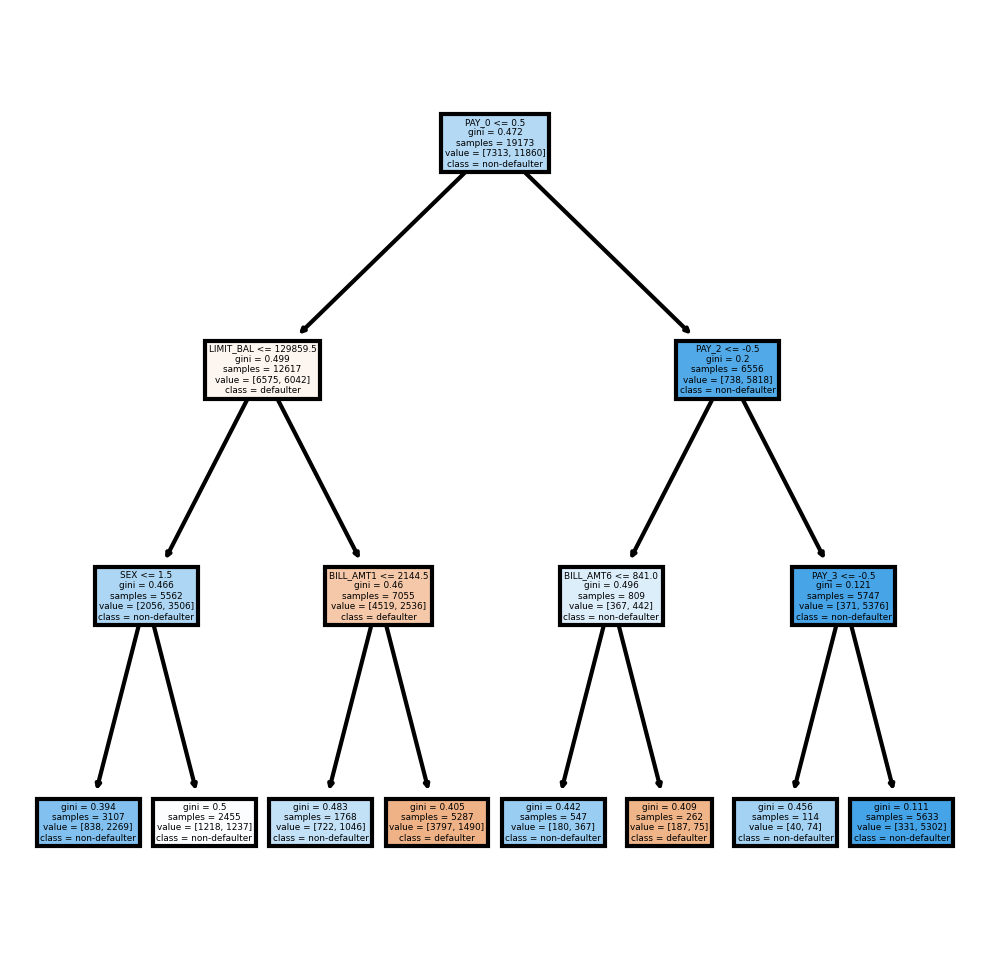

In [33]:
feature_name = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
class_name = ['defaulter', 'non-defaulter'] 
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(DT_gini, feature_names = feature_name, class_names = class_name, filled = True);
fig.savefig('DecisionTree.png')

The above decision tree model above, the gini index was used simply to reduce the level of entropy from the root node to the leaf node and by this way the decision tree is optimized. From the visual above, the root node is the earliest repayment month PAY_0 which branches out into LIMIT_BAL and the third repayment month PAY_3. Classed into defaulters and non-defaulters whih mean for every client with no due repayment by the third month would be a non-deaulter whilst a client with a credit LIMIT_BAL of <= 129859.5 will likely default. 

------------------------------ 3. RANDOMFOREST
-

In [34]:
RF_clf = RandomForestClassifier(n_estimators=100)
RF_clf.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
RF_y_pred = RF_clf.predict(X_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(RF_clf.score(X_test, y_test)))

Accuracy of Random Forest classifier on test set: 0.90


Confusion Matrix Without Normalization
[[2591  476]
 [ 363 4788]]


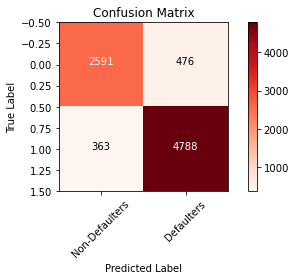

In [36]:
RF_cm = confusion_matrix(y_test, RF_y_pred)

def plot_confusion_matrix(RF_cm, classes,
                         normalize = False, title = 'Confusion Matrix',
                         cmap = plt.cm.Reds):
    
    #prints and plots the confusion matrix
    plt.imshow(RF_cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    
    if normalize:
        RF_cm = RF_cm.astype('float') / RF_cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix Without Normalization")
    print(RF_cm)
    
    thresh = RF_cm.max()/2
    for i, j in itertools.product(range(RF_cm.shape[0]), range(RF_cm.shape[1])):
        plt.text(j, i, RF_cm[i, j], 
                horizontalalignment = "center",
                color = "white" if RF_cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel("True Label")
        plt.xlabel("Predicted Label")
        
cm_plot_labels = ["Non-Defaulters", "Defaulters"]
plot_confusion_matrix(RF_cm = RF_cm, classes = cm_plot_labels, title = 'Confusion Matrix')

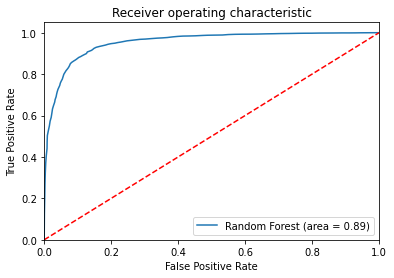

In [37]:
RF_roc_auc = roc_auc_score(y_test, RF_clf.predict(X_test))
RF_fpr, RF_tpr, RF_thresholds = roc_curve(y_test, RF_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(RF_fpr, RF_tpr, label='Random Forest (area = %0.2f)' % RF_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

In [38]:
print(classification_report(y_test, RF_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      3067
           1       0.91      0.93      0.92      5151

    accuracy                           0.90      8218
   macro avg       0.89      0.89      0.89      8218
weighted avg       0.90      0.90      0.90      8218



In [39]:
feature_scores = pd.DataFrame(RF_clf.feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False)
print(feature_scores)

                  0
LIMIT_BAL  0.086674
PAY_0      0.079085
BILL_AMT1  0.059984
PAY_2      0.059400
PAY_AMT1   0.056554
PAY_AMT2   0.055697
PAY_3      0.048907
BILL_AMT2  0.047718
PAY_AMT3   0.046203
BILL_AMT3  0.043167
PAY_AMT4   0.041886
PAY_AMT6   0.041030
BILL_AMT4  0.040114
BILL_AMT6  0.039111
BILL_AMT5  0.039083
PAY_AMT5   0.038036
AGE        0.037920
SEX        0.027655
MARRIAGE   0.025186
PAY_5      0.024746
PAY_4      0.022296
PAY_6      0.019841
EDUCATION  0.019707


The main influencing feature can be seen to be earliest repayment time - The return of the money for Lending is way important than the return on the money

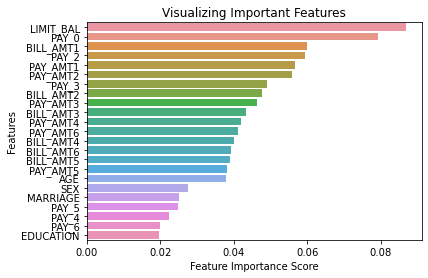

In [40]:
feature_score = pd.Series(RF_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_score
# Creating a seaborn bar plot

sns.barplot(x=feature_score, y=feature_score.index)

# Add labels to the graph

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph

plt.title("Visualizing Important Features")

# Visualize the graph

plt.show()

---------------------------------------- 4. KNN MODEL
-

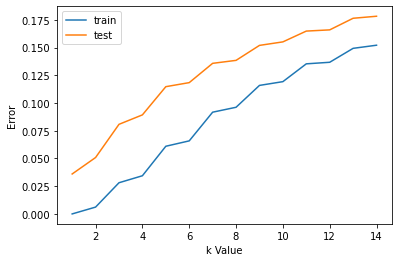

In [41]:
error1= []
error2= []
for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    error2.append(np.mean(y_test!= y_pred2))
# plt.figure(figsize(10,5))
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

In [42]:
knn_clf = KNeighborsClassifier(n_neighbors=8)
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [43]:
KNN_y_pred = knn_clf.predict(X_test)
print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn_clf.score(X_test, y_test)))

Accuracy of KNN classifier on test set: 0.86


Confusion Matrix Without Normalization
[[2319  748]
 [ 390 4761]]


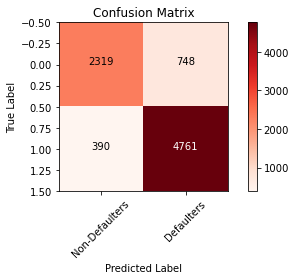

In [44]:
KNN_cm = confusion_matrix(y_test, KNN_y_pred)

def plot_confusion_matrix(KNN_cm, classes,
                         normalize = False, title = 'Confusion Matrix',
                         cmap = plt.cm.Reds):
    
    #prints and plots the confusion matrix
    plt.imshow(KNN_cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    
    if normalize:
        KNN_cm = KNN_cm.astype('float') / KNN_cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix Without Normalization")
    print(KNN_cm)
    
    thresh = KNN_cm.max()/2
    for i, j in itertools.product(range(KNN_cm.shape[0]), range(KNN_cm.shape[1])):
        plt.text(j, i, KNN_cm[i, j], 
                horizontalalignment = "center",
                color = "white" if KNN_cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel("True Label")
        plt.xlabel("Predicted Label")
        
cm_plot_labels = ["Non-Defaulters", "Defaulters"]
plot_confusion_matrix(KNN_cm = KNN_cm, classes = cm_plot_labels, title = 'Confusion Matrix')

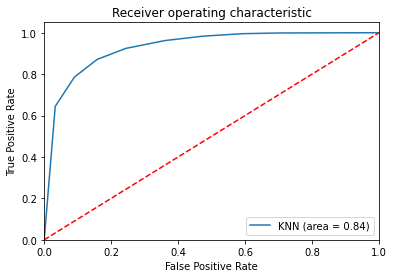

In [45]:
KNN_roc_auc = roc_auc_score(y_test, knn_clf.predict(X_test))
KNN_fpr, KNN_tpr, KNN_thresholds = roc_curve(y_test, knn_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(KNN_fpr, KNN_tpr, label='KNN (area = %0.2f)' % KNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

In [46]:
print(classification_report(y_test, KNN_y_pred))

              precision    recall  f1-score   support

           0       0.86      0.76      0.80      3067
           1       0.86      0.92      0.89      5151

    accuracy                           0.86      8218
   macro avg       0.86      0.84      0.85      8218
weighted avg       0.86      0.86      0.86      8218



------------------------- 5. SVM ALGORITHM
-

Using a hyperplance, this model divides the classes into non-defaulters and defaulters

In [47]:
SVC_clf = SVC(probability=True)
SVC_clf.fit(X_train, y_train)

SVC(probability=True)

In [48]:
SVC_y_pred = SVC_clf.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(SVC_clf.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.75


Confusion Matrix Without Normalization
[[1306 1761]
 [ 295 4856]]


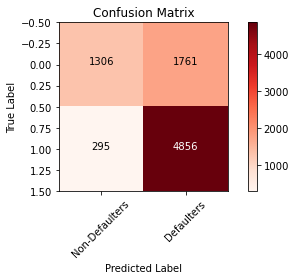

In [49]:
SVC_cm = confusion_matrix(y_test, SVC_y_pred)

def plot_confusion_matrix(SVC_cm, classes,
                         normalize = False, title = 'Confusion Matrix',
                         cmap = plt.cm.Reds):
    
    #prints and plots the confusion matrix
    plt.imshow(SVC_cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    
    if normalize:
        SVC_cm = SVC_cm.astype('float') / SVC_cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix Without Normalization")
    print(SVC_cm)
    
    thresh = SVC_cm.max()/2
    for i, j in itertools.product(range(SVC_cm.shape[0]), range(SVC_cm.shape[1])):
        plt.text(j, i, SVC_cm[i, j], 
                horizontalalignment = "center",
                color = "white" if SVC_cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel("True Label")
        plt.xlabel("Predicted Label")
        
cm_plot_labels = ["Non-Defaulters", "Defaulters"]
plot_confusion_matrix(SVC_cm = SVC_cm, classes = cm_plot_labels, title = 'Confusion Matrix')

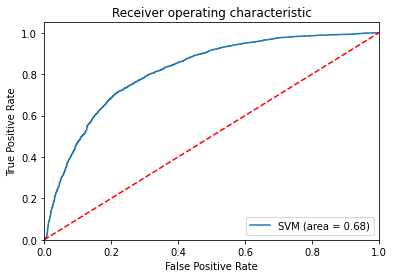

In [50]:
SVC_roc_auc = roc_auc_score(y_test, SVC_clf.predict(X_test))
SVM_fpr, SVM_tpr, SVM_thresholds = roc_curve(y_test, SVC_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(SVM_fpr, SVM_tpr, label='SVM (area = %0.2f)' % SVC_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC')
plt.show()

In [51]:
print(classification_report(y_test, SVC_y_pred))

              precision    recall  f1-score   support

           0       0.82      0.43      0.56      3067
           1       0.73      0.94      0.83      5151

    accuracy                           0.75      8218
   macro avg       0.77      0.68      0.69      8218
weighted avg       0.76      0.75      0.73      8218



---------------- 6. NAIVE BAYSE MODEL
-

This is one of the simplest supervised learning algorithms. It is referred to as NAIVE because it assumes that each feature is independent of another which is not the case in real life.

In [52]:
GNB_clf = GaussianNB()
GNB_clf.fit(X_train, y_train)

GaussianNB()

In [53]:
GNB_y_pred = GNB_clf.predict(X_test)
print('Accuracy of Gaussian NB classifier on test set: {:.2f}'.format(GNB_clf.score(X_test, y_test)))

Accuracy of Gaussian NB classifier on test set: 0.68


Confusion Matrix Without Normalization
[[ 654 2413]
 [ 191 4960]]


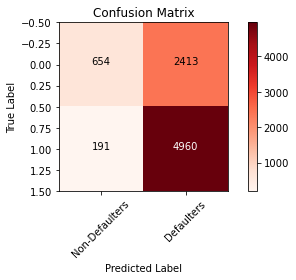

In [54]:
GNB_cm = confusion_matrix(y_test, GNB_y_pred)

def plot_confusion_matrix(GNB_cm, classes,
                         normalize = False, title = 'Confusion Matrix',
                         cmap = plt.cm.Reds):
    
    #prints and plots the confusion matrix
    plt.imshow(GNB_cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    
    if normalize:
        GNB_cm = GNB_cm.astype('float') / GNB_cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix Without Normalization")
    print(GNB_cm)
    
    thresh = GNB_cm.max()/2
    for i, j in itertools.product(range(GNB_cm.shape[0]), range(GNB_cm.shape[1])):
        plt.text(j, i, GNB_cm[i, j], 
                horizontalalignment = "center",
                color = "white" if GNB_cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel("True Label")
        plt.xlabel("Predicted Label")
        
cm_plot_labels = ["Non-Defaulters", "Defaulters"]
plot_confusion_matrix(GNB_cm = GNB_cm, classes = cm_plot_labels, title = 'Confusion Matrix')

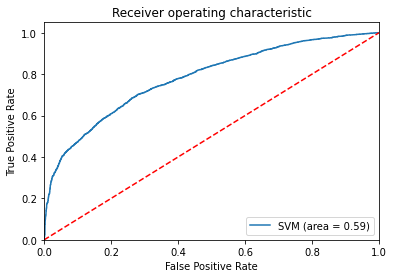

In [55]:
GNB_roc_auc = roc_auc_score(y_test, GNB_clf.predict(X_test))
GNB_fpr, GNB_tpr, GNB_thresholds = roc_curve(y_test, GNB_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(GNB_fpr, GNB_tpr, label='SVM (area = %0.2f)' % GNB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('GNB_ROC')
plt.show()

In [56]:
print(classification_report(y_test, GNB_y_pred))

              precision    recall  f1-score   support

           0       0.77      0.21      0.33      3067
           1       0.67      0.96      0.79      5151

    accuracy                           0.68      8218
   macro avg       0.72      0.59      0.56      8218
weighted avg       0.71      0.68      0.62      8218



-------------------- 7. ADABOOSTER CLASSIFIER
-

In full, Adaptive Booster is another model that can be used for classification problems

In [57]:
ADB_clf = AdaBoostClassifier(n_estimators=100, random_state=0)
ADB_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [58]:
ADB_y_pred = ADB_clf.predict(X_test)
print('Accuracy of ADB classifier on test set: {:.2f}'.format(ADB_clf.score(X_test, y_test)))

Accuracy of ADB classifier on test set: 0.81


Confusion Matrix Without Normalization
[[2197  870]
 [ 692 4459]]


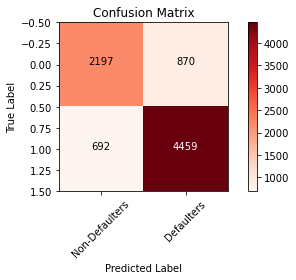

In [59]:
ADB_cm = confusion_matrix(y_test, ADB_y_pred)

def plot_confusion_matrix(ADB_cm, classes,
                         normalize = False, title = 'Confusion Matrix',
                         cmap = plt.cm.Reds):
    
    #prints and plots the confusion matrix
    plt.imshow(ADB_cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    
    if normalize:
        ADB_cm = ADB_cm.astype('float') / ADB_cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix Without Normalization")
    print(ADB_cm)
    
    thresh = ADB_cm.max()/2
    for i, j in itertools.product(range(ADB_cm.shape[0]), range(ADB_cm.shape[1])):
        plt.text(j, i, ADB_cm[i, j], 
                horizontalalignment = "center",
                color = "white" if ADB_cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel("True Label")
        plt.xlabel("Predicted Label")
        
cm_plot_labels = ["Non-Defaulters", "Defaulters"]
plot_confusion_matrix(ADB_cm = ADB_cm, classes = cm_plot_labels, title = 'Confusion Matrix')

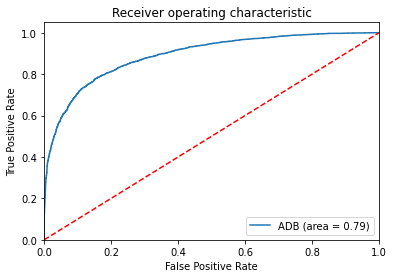

In [60]:
ADB_roc_auc = roc_auc_score(y_test, ADB_clf.predict(X_test))
ADB_fpr, ADB_tpr, ADB_thresholds = roc_curve(y_test, ADB_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(ADB_fpr, ADB_tpr, label='ADB (area = %0.2f)' % ADB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ADB_ROC')
plt.show()

In [61]:
print(classification_report(y_test, ADB_y_pred))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      3067
           1       0.84      0.87      0.85      5151

    accuracy                           0.81      8218
   macro avg       0.80      0.79      0.79      8218
weighted avg       0.81      0.81      0.81      8218



------------------------------------------- 8. XGBOOST MODEL
-

Extreme Gradient Boosting is another effective classifier algorithm

In [62]:
xgb_clf = xgb.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=500, 
                            objective='binary:logistic', booster='gbtree')
xgb_clf.fit(X_train, y_train)

C:\Users\monda\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:04:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
xgbc_y_pred = xgb_clf.predict(X_test)
print('Accuracy of ADB classifier on test set: {:.2f}'.format(xgb_clf.score(X_test, y_test)))

Accuracy of ADB classifier on test set: 0.86


Confusion Matrix Without Normalization
[[2464  603]
 [ 537 4614]]


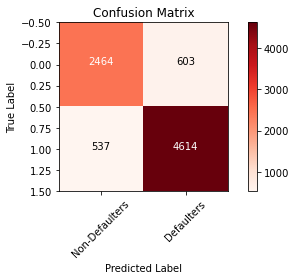

In [64]:
xgb_cm = confusion_matrix(y_test, xgbc_y_pred)

def plot_confusion_matrix(xgb_cm, classes,
                         normalize = False, title = 'Confusion Matrix',
                         cmap = plt.cm.Reds):
    
    #prints and plots the confusion matrix
    plt.imshow(xgb_cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    
    if normalize:
        xgb_cm = xgb_cm.astype('float') / xgb_cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix Without Normalization")
    print(xgb_cm)
    
    thresh = xgb_cm.max()/2
    for i, j in itertools.product(range(xgb_cm.shape[0]), range(xgb_cm.shape[1])):
        plt.text(j, i, xgb_cm[i, j], 
                horizontalalignment = "center",
                color = "white" if xgb_cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel("True Label")
        plt.xlabel("Predicted Label")
        
cm_plot_labels = ["Non-Defaulters", "Defaulters"]
plot_confusion_matrix(xgb_cm = xgb_cm, classes = cm_plot_labels, title = 'Confusion Matrix')

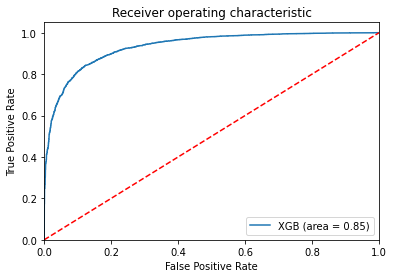

In [65]:
XGB_roc_auc = roc_auc_score(y_test, xgb_clf.predict(X_test))
XGB_fpr, XGB_tpr, XGB_thresholdss = roc_curve(y_test, xgb_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(XGB_fpr, XGB_tpr, label='XGB (area = %0.2f)' % XGB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

In [66]:
print(classification_report(y_test, xgbc_y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      3067
           1       0.88      0.90      0.89      5151

    accuracy                           0.86      8218
   macro avg       0.85      0.85      0.85      8218
weighted avg       0.86      0.86      0.86      8218



In [67]:
Algorithms = pd.DataFrame({'Model Name': ['Random Forest', 'KNN', "XGB Classifier", "AdaBooster", "SVM", 'Decision Tree', 'Logistic Regression', 'Guassian Naive Bayse'], 
                           'Accuracy': [RF_clf.score(X_test, y_test), knn_clf.score(X_test, y_test), xgb_clf.score(X_test, y_test), ADB_clf.score(X_test, y_test), 
                                         SVC_clf.score(X_test, y_test), 
                                        DT_gini.score(X_test, y_test), LogReg.score(X_test, y_test),    
                                         GNB_clf.score(X_test, y_test)]})

Panda framework was used to append all the classifiers into a table with their respective accuracies to be visualized thereafter

In [68]:
print(Algorithms)

             Model Name  Accuracy
0         Random Forest  0.897907
1                   KNN  0.861523
2        XGB Classifier  0.861280
3            AdaBooster  0.809929
4                   SVM  0.749817
5         Decision Tree  0.743977
6   Logistic Regression  0.728523
7  Guassian Naive Bayse  0.683135


Output of the pandas generated table of models used and their accuracies

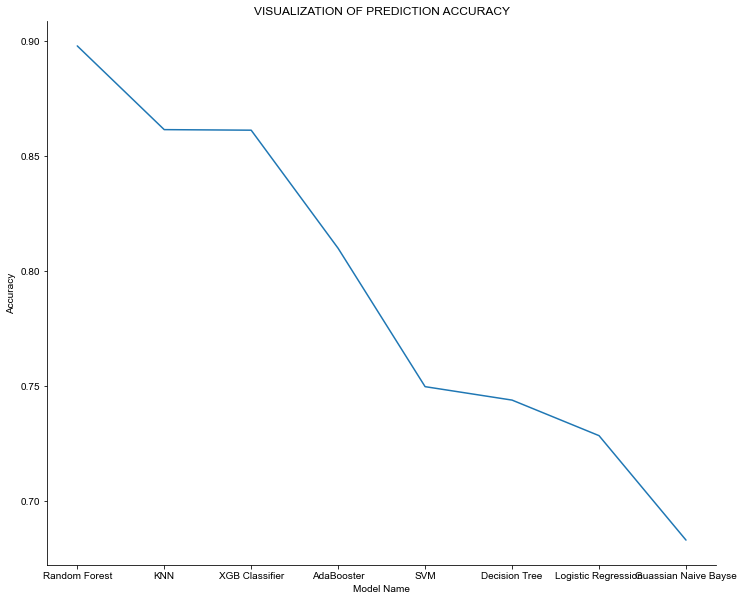

In [69]:
fig, ax = plt.subplots(figsize = (12,10)) 
sns.set_style("dark")
sns.lineplot(x = "Model Name", y = "Accuracy", data=Algorithms).set_title('VISUALIZATION OF PREDICTION ACCURACY')
sns.despine()
sns.set_context("paper")
sns.set_palette('Accent')
plt.show()

A line chart of the classifiers used in the order of their performance accuracy

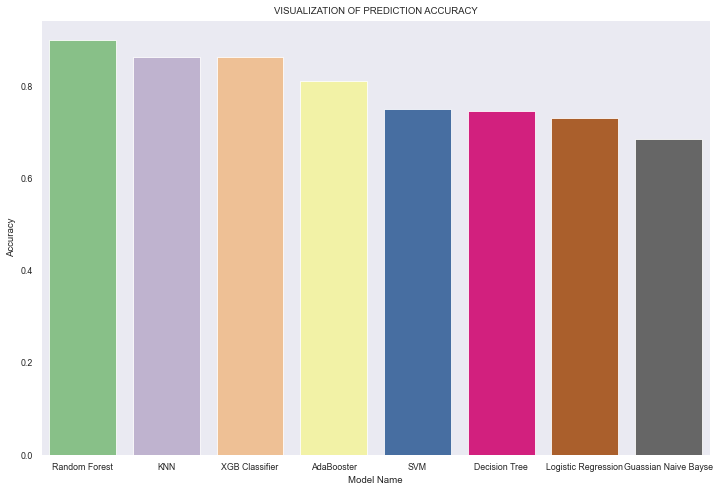

In [70]:
fig, ax = plt.subplots(figsize = (12,8)) 
sns.set_style("darkgrid")
sns.barplot(x = "Model Name", y = "Accuracy", data=Algorithms).set_title('VISUALIZATION OF PREDICTION ACCURACY')
sns.set_context("paper")
plt.show()

A bar plot representation of the classifiers used in the order of their performance accuracy

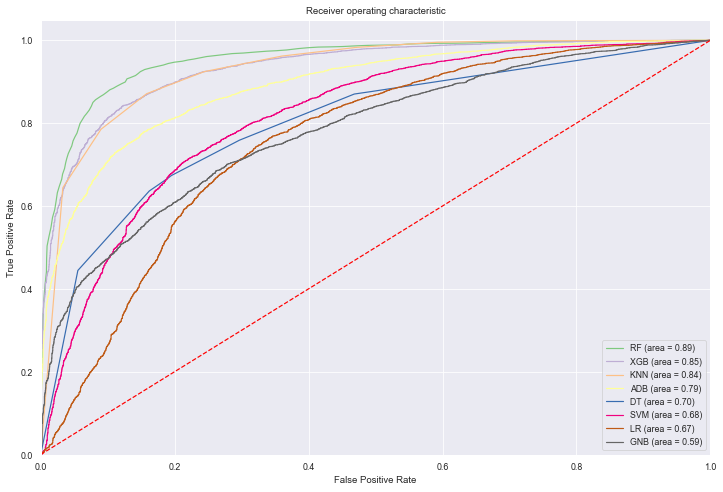

In [71]:
fig, ax = plt.subplots(figsize = (12,8))
plt.plot(RF_fpr, RF_tpr, label='RF (area = %0.2f)' % RF_roc_auc)
plt.plot(XGB_fpr, XGB_tpr, label='XGB (area = %0.2f)' % XGB_roc_auc)
plt.plot(KNN_fpr, KNN_tpr, label='KNN (area = %0.2f)' % KNN_roc_auc)
plt.plot(ADB_fpr, ADB_tpr, label='ADB (area = %0.2f)' % ADB_roc_auc)
plt.plot(DT_fpr, DT_tpr, label='DT (area = %0.2f)' % DT_roc_auc)
plt.plot(SVM_fpr, SVM_tpr, label='SVM (area = %0.2f)' % SVC_roc_auc)
plt.plot(lr_fpr, lr_tpr, label='LR (area = %0.2f)' % logreg_roc_auc)
plt.plot(GNB_fpr, GNB_tpr, label='GNB (area = %0.2f)' % GNB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ALL_MODEL_ROC')
plt.show()

The above plot shows the ROC curve of all the classifiers used